<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/NNs/Exercise_3_nn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - MNIST

1. Use the $\texttt{mnist}$ dataset (as just shown in the slides). Build a neural network using what we have explored so far and evaluate its performance on the test data.
1. Explore whether your neural network appears to be under- or overfitting by constructing plots of the train and test losses and accuracies during training. Use this information to improve your model - that is, train for longer if it appears to be underfitting and shorter if it appears to be overfitting. Does your test performance improve? What about your train performance?
1. (Bonus): Later during the semester, we will explore *convolutional neural networks*. For those of you finished with (1) and (2), you may try this now to improve your model; check https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D for details.

**See slides for more details!**

# Exercise 1

Use the $\texttt{mnist}$ dataset (as just shown in the slides). Build a neural network using what we have explored so far and evaluate its performance on the test data.

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import Input
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

seed = 42
tf.random.set_seed(seed)

In [14]:
# Parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 64
epochs = 10

In [15]:
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Here is a model to get you started.

Take note of the "Flatten" layer. This is important to reshape your data from (28, 28) to (784,).

Alternatively, you could reshape your data (the x's). This can be done using:

$\texttt{x = x.reshape(n, 784)}$ 

where $n$ is the number of samples (60k for training, 10k for test).

Then you don't need the Flatten layer, but remember to still specify an input shape of your first layer (i.e. 784 if you have done this reshaping).

**Note**: Do feel free to experiment with the number of layers, nodes per layer, and optimizer.

In [16]:
model = Sequential([
    Flatten(input_shape = input_shape),
    Dense(128, activation = 'relu'),
    Dense(num_classes)
    ])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split = 0.1
                    )

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 9.0294 - accuracy: 0.1606 - val_loss: 8.8384 - val_accuracy: 0.1417
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 9.2324 - accuracy: 0.1564 - val_loss: 9.6497 - val_accuracy: 0.2127
Epoch 3/10
844/844 [==============================] - 4s 4ms/step - loss: 8.8969 - accuracy: 0.1520 - val_loss: 8.0188 - val_accuracy: 0.1075
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 7.8958 - accuracy: 0.1013 - val_loss: 8.0429 - val_accuracy: 0.1083
Epoch 5/10
844/844 [==============================] - 3s 3ms/step - loss: 8.0701 - accuracy: 0.1016 - val_loss: 8.4029 - val_accuracy: 0.1092
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 8.1361 - accuracy: 0.1019 - val_loss: 8.4029 - val_accuracy: 0.1092
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 8.1361 - accuracy: 0.1019 - val_loss: 8.4029 - val_accuracy: 0.1092
Epoch 

In [18]:
loss, accuracy = model.evaluate(X_test,
                                y_test,
                                verbose = 0
                                )

print(f'Test Loss: {round(loss, 3)}')
print(f'Test Accuracy: {round(accuracy*100, 3)}%')

Test Loss: 8.238
Test Accuracy: 10.19%


Here is a small function you can use as a starting point for your network - but feel free to experiment!

# Exercise 2

Explore whether your neural network appears to be under- or overfitting by constructing plots of the train and test losses and accuracies during training. Use this information to improve your model - that is, train for longer if it appears to be underfitting and shorter if it appears to be overfitting. Does your test performance improve? What about your train performance?

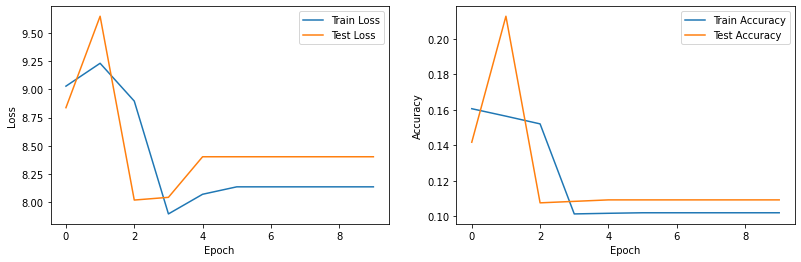

In [19]:
fig = plt.figure(figsize = plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'],
        label = 'Train Loss')

ax.plot(history.history['val_loss'],
        label = 'Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'],
        label = 'Train Accuracy')

ax.plot(history.history['val_accuracy'],
        label = 'Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Exericse 3

Later during the semester, we will explore *convolutional neural networks*. For those of you finished with (1) and (2), you may try this now to improve your model; check https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D for details.

In [20]:
model_cnn = Sequential([
    Input(shape = input_shape),
    Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(num_classes, activation = 'softmax')
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

history = model_cnn.fit(X_train,
                        y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_split = 0.1
                        )

Epoch 1/10
844/844 [==============================] - 4s 5ms/step - loss: 0.2855 - accuracy: 0.9134 - val_loss: 0.0679 - val_accuracy: 0.9807
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0970 - accuracy: 0.9708 - val_loss: 0.0552 - val_accuracy: 0.9850
Epoch 3/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0733 - accuracy: 0.9776 - val_loss: 0.0422 - val_accuracy: 0.9887
Epoch 4/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0637 - accuracy: 0.9796 - val_loss: 0.0381 - val_accuracy: 0.9898
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0392 - val_accuracy: 0.9890
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.0338 - val_accuracy: 0.9917
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 

In [22]:
loss, accuracy = model_cnn.evaluate(X_test,
                                y_test,
                                verbose = 0
                                )

print(f'Test Loss: {round(loss, 3)}')
print(f'Test Accuracy: {round(accuracy*100, 3)}%')

Test Loss: 0.024
Test Accuracy: 99.13%


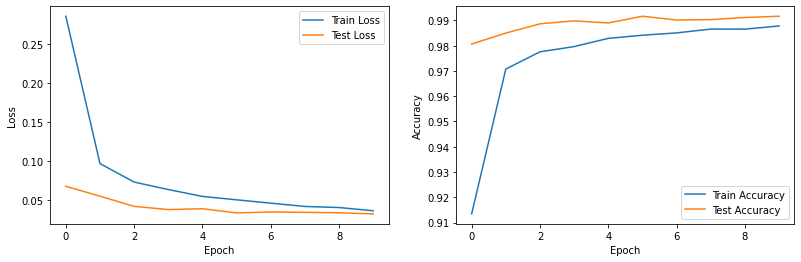

In [23]:
fig = plt.figure(figsize = plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'],
        label = 'Train Loss')

ax.plot(history.history['val_loss'],
        label = 'Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'],
        label = 'Train Accuracy')

ax.plot(history.history['val_accuracy'],
        label = 'Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()